Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  ticker        date     time  \
0   AAPL  2023-03-13  03:39PM   
1   AAPL  2023-03-13  03:22PM   
2   AAPL  2023-03-13  01:06PM   
3   AAPL  2023-03-13  10:01AM   
4   AAPL  2023-03-13  09:30AM   
5   AAPL  2023-03-13  09:01AM   
6   AAPL  2023-03-13  09:00AM   
7   AAPL  2023-03-13  08:00AM   
8   AAPL  2023-03-13  05:52AM   
9   AAPL  2023-03-13  05:05AM   

                                               title  
0  Court revives Apple, Google challenge to U.S. ...  
1  Let's Shine a Light on Organic Light Emitting ...  
2  Why Apple and Microsoft Are This Analysts Choi...  
3  Apple's (AAPL) Animation Film Emerges Winner a...  
4  Got $1,000? 2 Warren Buffett Stocks to Buy Han...  
5  Target, Amazon and 4 More Retailers That Will ...  
6  Apple Inc. (AAPL) Is a Trending Stock: Facts t...  
7      When Should You Buy Apple Inc. (NASDAQ:AAPL)?  
8  Prediction: These 3 Stocks Will Be in the Dow ...  
9          3 Stocks Warren Buffett Can't Stop Buying  


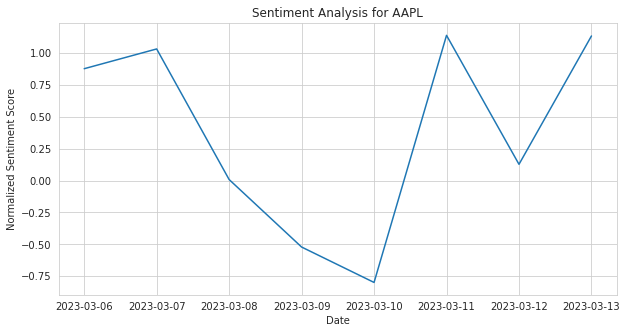

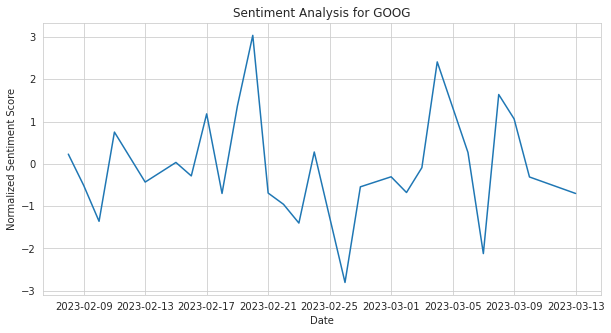

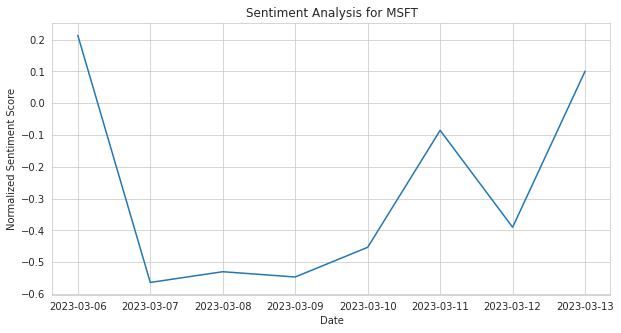

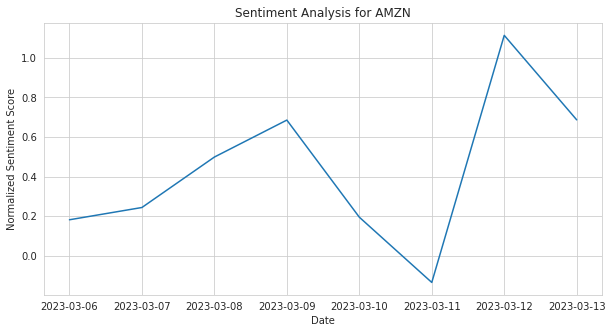

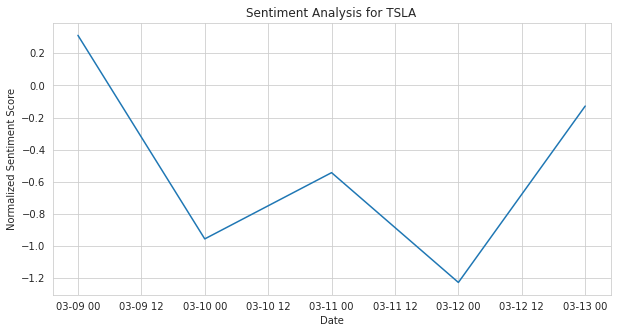

In [48]:
!pip install beautifulsoup4 nltk pandas numpy matplotlib seaborn wordcloud

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import requests
import pandas as pd
from urllib.request import Request, urlopen
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']
finviz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}

# Get the news tables for all tickers
for ticker in tickers:
    url = finviz_url + ticker
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
    req = Request(url=url, headers=headers)
    response = urlopen(req)
    html = BeautifulSoup(response)
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

# Extract the news headlines and create a DataFrame
columns = ['ticker', 'date', 'time', 'title']
news_list = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split()
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        news_list.append([ticker, date, time, title])

news_df = pd.DataFrame(news_list, columns=columns)
news_df['date'] = pd.to_datetime(news_df['date']).dt.date

# Print the first 10 rows of the DataFrame
print(news_df.head(10))

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score for a given headline
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Calculate the sentiment score for each headline
news_df['sentiment_score'] = news_df['title'].apply(get_sentiment_score)

# Calculate the average sentiment score for each day
daily_sentiment_df = news_df.groupby(['ticker', 'date'])['sentiment_score'].mean().reset_index()

# Scale the sentiment scores to a normalized score
daily_sentiment_df['normalized_score'] = (daily_sentiment_df['sentiment_score'] - daily_sentiment_df['sentiment_score'].mean()) / daily_sentiment_df['sentiment_score'].std()

# Define the start and end date of the time frame
# start_date = '2023-01-01'
# end_date = '2023-02-15'
# from datetime import datetime
# start_date = datetime.strptime('2023-01-01', '%Y-%m-%d').date()
# end_date = datetime.strptime('2023-02-15', '%Y-%m-%d').date()

# Filter the news articles based on the date range
# news_df = news_df[(news_df['date'] >= start_date) & (news_df['date'] <= end_date)]

# Calculate the sentiment score for each headline
# news_df['sentiment_score'] = news_df['title'].apply(get_sentiment_score)

# Calculate the average sentiment score for each day
# daily_sentiment_df = news_df.groupby(['ticker', 'date'])['sentiment_score'].mean().reset_index()

# Scale the sentiment scores to a normalized score
# daily_sentiment_df['normalized_score'] = (daily_sentiment_df['sentiment_score'] - daily_sentiment_df['sentiment_score'].mean()) / daily_sentiment_df['sentiment_score'].std()

# Visualize the normalized sentiment scores using a line chart
sns.set_style('whitegrid')
for ticker in tickers:
    ticker_df = daily_sentiment_df[daily_sentiment_df['ticker'] == ticker]
    plt.figure(figsize=(10, 5))
    plt.plot(ticker_df['date'], ticker_df['normalized_score'])
    plt.title(f'Sentiment Analysis for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Normalized Sentiment Score')
    plt.show()




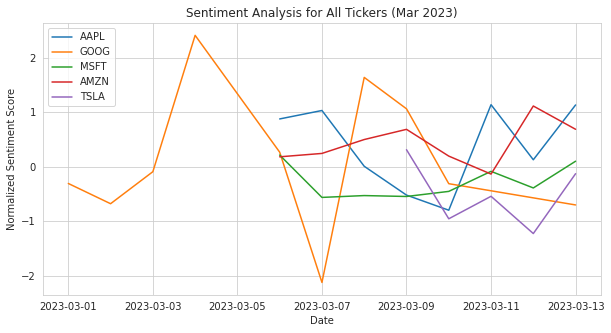

In [49]:
# Set the start and end dates
start_date = pd.to_datetime('2023-03-01').date()
end_date = pd.to_datetime('2023-03-31').date()

# Filter the daily_sentiment_df DataFrame to include only the rows that fall within the date range
df = daily_sentiment_df.loc[(daily_sentiment_df['date'] >= start_date) & (daily_sentiment_df['date'] <= end_date)]

# Create a line chart to visualize the sentiment scores for all tickers
plt.figure(figsize=(10, 5))
for ticker in tickers:
    ticker_df = df[df['ticker'] == ticker]
    plt.plot(ticker_df['date'], ticker_df['normalized_score'], label=ticker)
plt.title('Sentiment Analysis for All Tickers (Mar 2023)')
plt.xlabel('Date')
plt.ylabel('Normalized Sentiment Score')
plt.legend()
plt.show()


In [50]:
# Print all the headlines for each ticker
for ticker in tickers:
    ticker_news_df = news_df[news_df['ticker'] == ticker]
    print(f'Headlines for {ticker}:')
    for headline in ticker_news_df['title']:
        print(headline)
    print('\n')


Headlines for AAPL:
Court revives Apple, Google challenge to U.S. patent-review policy
Let's Shine a Light on Organic Light Emitting Diodes and a Major Tech Stock
Why Apple and Microsoft Are This Analysts Choice Following the SVB Fallout
Apple's (AAPL) Animation Film Emerges Winner at 2023 Oscars
Got $1,000? 2 Warren Buffett Stocks to Buy Hand Over Fist
Target, Amazon and 4 More Retailers That Will Reward You for Turning in Your Old Stuff
Apple Inc. (AAPL) Is a Trending Stock: Facts to Know Before Betting on It
When Should You Buy Apple Inc. (NASDAQ:AAPL)?
Prediction: These 3 Stocks Will Be in the Dow by 2030
3 Stocks Warren Buffett Can't Stop Buying
Apple TV+ wins Academy Award for Best Animated Short Film The Boy, the Mole, the Fox and the Horse
3 Top Tech Stocks to Buy During a Recession
2 Top Bargain Stocks Ready for Bull Runs
Got $1,000? 5 Buffett Stocks to Buy and Hold Forever
These 7 Dividend Stocks Pay $96 Billion a Year, Combined, to Their Shareholders
Is It Too Late to Buy Ap

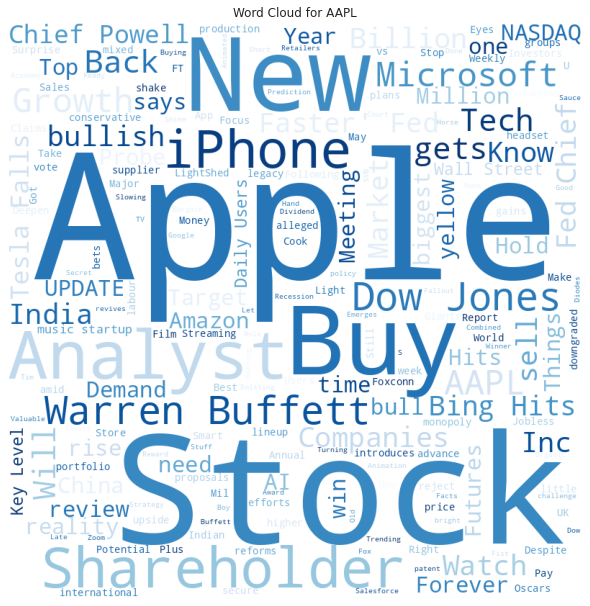

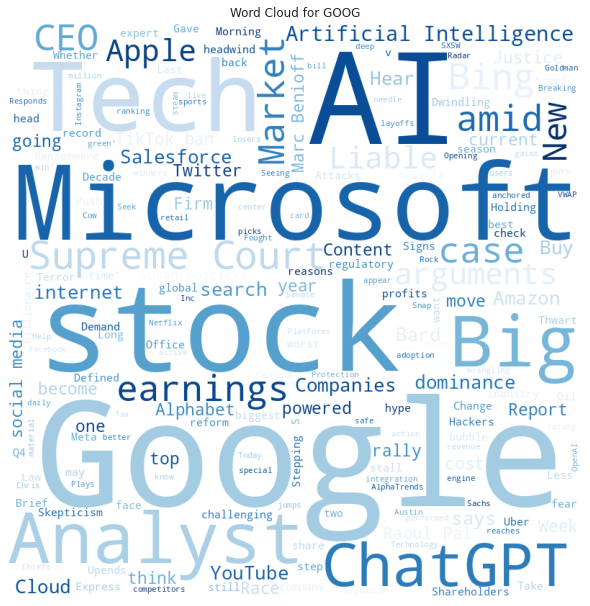

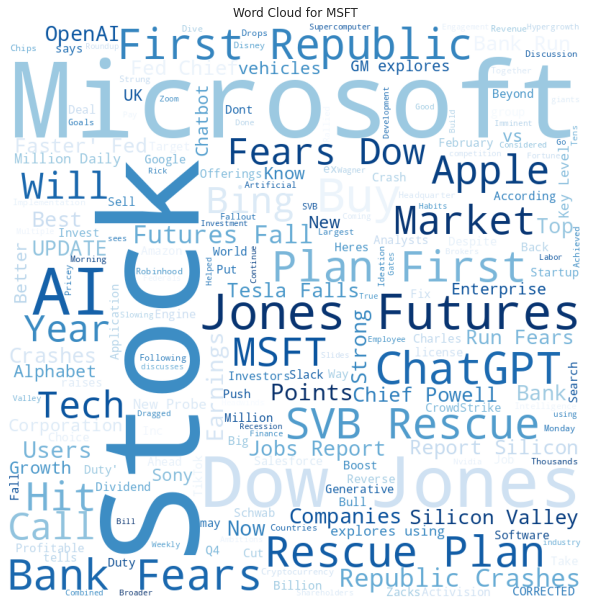

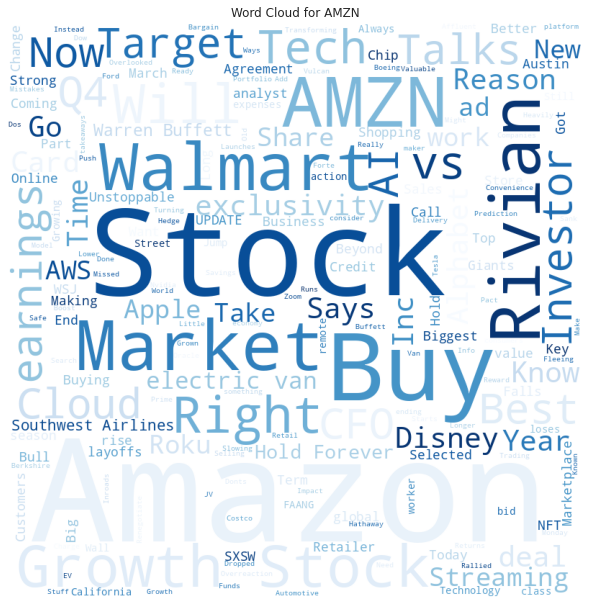

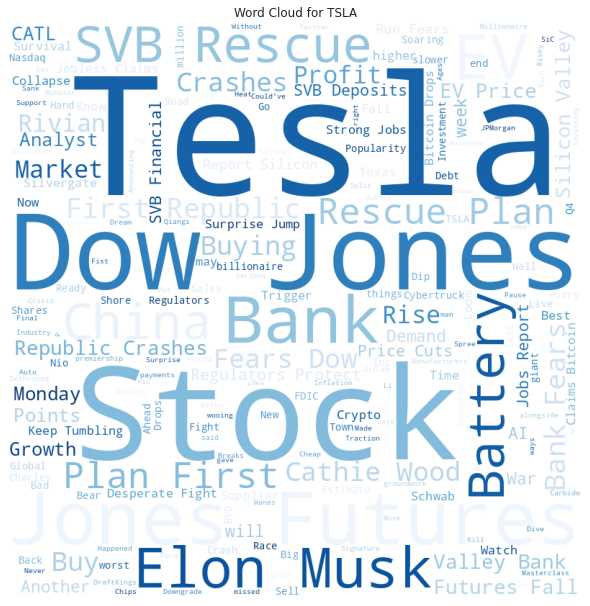

In [51]:
# Create a WordCloud for each ticker
from wordcloud import WordCloud

for ticker in tickers:
    # Get the news headlines for the current ticker
    ticker_df = news_df[news_df['ticker'] == ticker]
    # Join the headlines into a single text string
    text = ' '.join(ticker_df['title'].tolist())
    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10, colormap='Blues').generate(text)
    # Plot the WordCloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title(f'Word Cloud for {ticker}')
    plt.show()


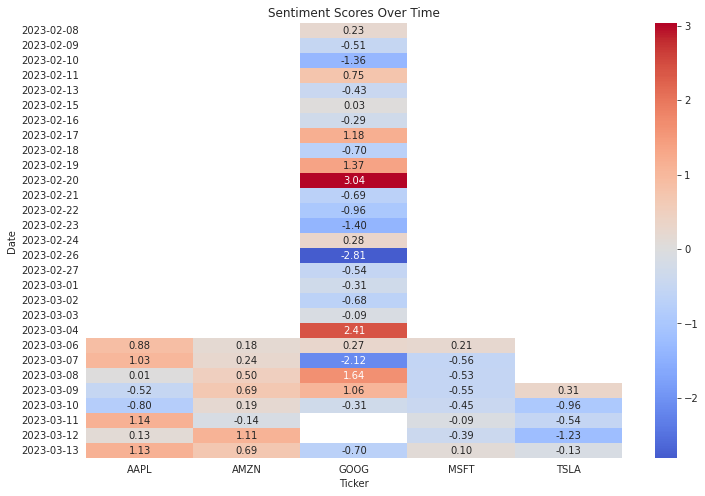

In [52]:
# Pivot the daily sentiment DataFrame to get the sentiment scores for each date and ticker
pivot_sentiment_df = daily_sentiment_df.pivot(index='date', columns='ticker', values='normalized_score')

# Create a heatmap of the sentiment scores over time for each ticker
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_sentiment_df, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Ticker')
plt.ylabel('Date')
plt.show()


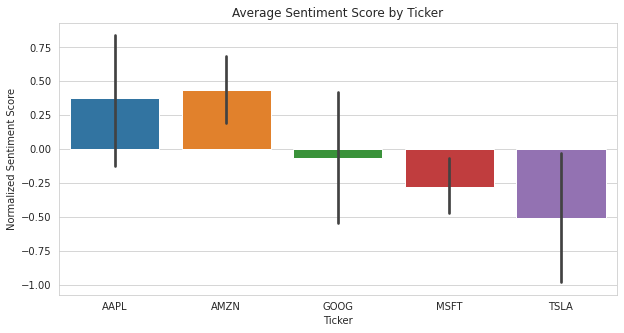

In [58]:
# Create a bar chart to show the average sentiment score for each ticker
plt.figure(figsize=(10, 5))
sns.barplot(x='ticker', y='normalized_score', data=daily_sentiment_df)
plt.title('Average Sentiment Score by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Normalized Sentiment Score')
plt.show()
